**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

**Load dataset**

In [3]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('diabetes.csv')

# Display basic info
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Saving diabetes.csv to diabetes (1).csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       8

**Prepare data**

In [4]:
# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Evaluation function and plot SVM**

In [5]:
# Function to evaluate and plot SVM results
def evaluate_svm(model, X_train, X_test, y_train, y_test, kernel_type):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print(f"\n{kernel_type} Kernel SVM  performance:")
    print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")

    print("\nClassification report:")
    print(classification_report(y_test, y_pred_test))

    cm = confusion_matrix(y_test, y_pred_test)
    ConfusionMatrixDisplay(cm, display_labels=['No Diabetes', 'Diabetes']).plot(cmap='Blues')
    plt.title(f'Confusion matrix - {kernel_type} Kernel SVM')
    plt.show()

    return model

**Linear kernel SVM**

Training Linear Kernel SVM:
------------------------------

Linear Kernel SVM  performance:
Training Accuracy: 0.7877
Test Accuracy: 0.7273

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       150
           1       0.65      0.49      0.56        81

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



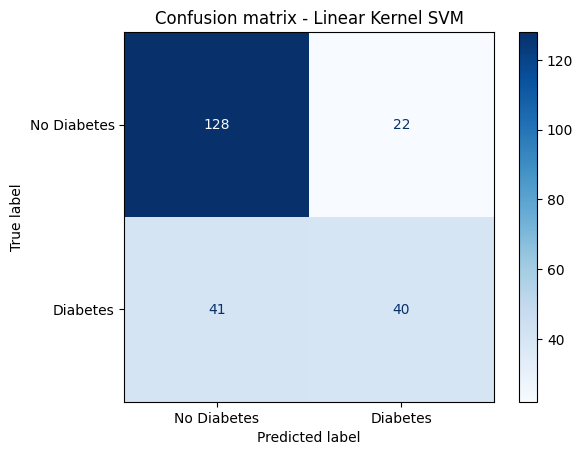

In [11]:
print("Training Linear Kernel SVM:")
print("-"*30)

linear_svm = SVC(kernel='linear', random_state=42)
linear_svm = evaluate_svm(linear_svm, X_train_scaled, X_test_scaled, y_train, y_test, "Linear")

**RBF Kernel SVM**

Training RBF Kernel SVM
------------------------------

RBF Kernel SVM  performance:
Training Accuracy: 0.8417
Test Accuracy: 0.7532

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       150
           1       0.69      0.54      0.61        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.75       231



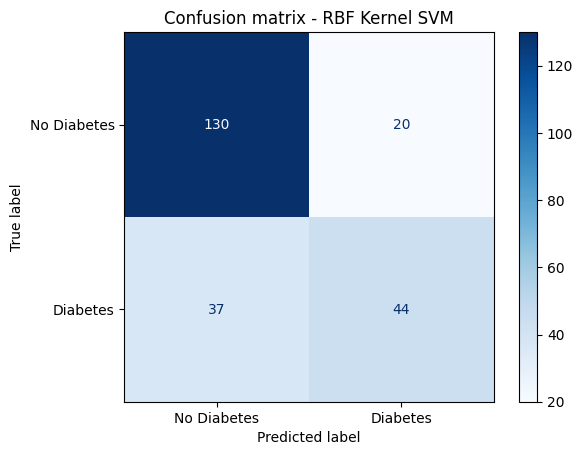

In [12]:
print("Training RBF Kernel SVM")
print("-"*30)

rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm = evaluate_svm(rbf_svm, X_train_scaled, X_test_scaled, y_train, y_test, "RBF")

**Hyperparameter  tuning (GridSearchCV)**

Hyperparameter Tuning for RBF Kernel SVM
-------------------------------------------
Best parameters found: {'C': 1, 'gamma': 0.01}
Best cross-validation accuracy: 0.7783

Tuned RBF Kernel SVM  performance:
Training Accuracy: 0.7914
Test Accuracy: 0.7489

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       150
           1       0.71      0.48      0.57        81

    accuracy                           0.75       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.74      0.75      0.73       231



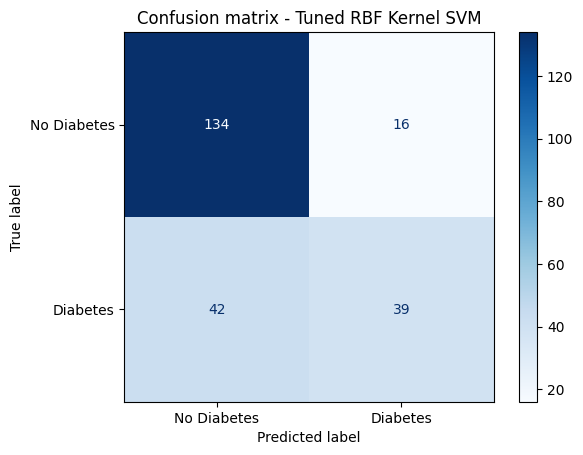

In [16]:
print("Hyperparameter Tuning for RBF Kernel SVM")
print("-"*43)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'scale', 'auto']
}
grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42),
                           param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

# Evaluate best model
best_svm = grid_search.best_estimator_
best_svm = evaluate_svm(best_svm, X_train_scaled, X_test_scaled, y_train, y_test,"Tuned RBF")

**PCA Decision boundary visualization**


Visualizing Decision Boundaries (2D PCA projection)
--------------------------------------------------


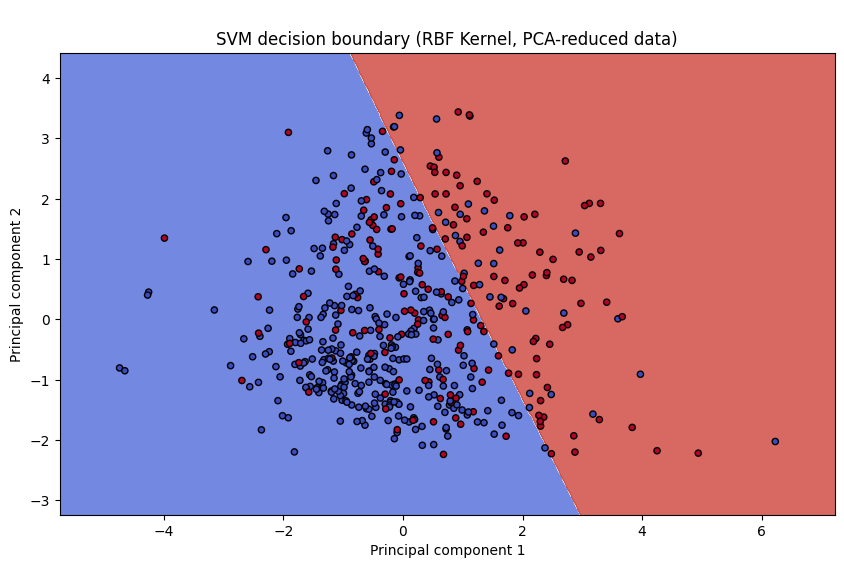


PCA-reduced SVM accuracy: 0.7142857142857143


In [18]:
print("\nVisualizing Decision Boundaries (2D PCA projection)")
print("-"*50)

# PCA for 2D visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Train SVM on PCA-reduced data
svm_pca = SVC(kernel='rbf', C=grid_search.best_params_['C'],
              gamma=grid_search.best_params_['gamma'], random_state=42)
svm_pca.fit(X_train_pca, y_train)

# Plot boundary
fig, ax = plt.subplots(figsize=(10, 6))
xx, yy = make_meshgrid(X_train_pca[:, 0], X_train_pca[:, 1])
plot_contours(ax, svm_pca, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_title('\nSVM decision boundary (RBF Kernel, PCA-reduced data)')
plt.show()

# Accuracy on test PCA data
y_pred_pca = svm_pca.predict(X_test_pca)
print("\nPCA-reduced SVM accuracy:", accuracy_score(y_test, y_pred_pca))